### Import Necessary Modules

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


### Load the dataset

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# Combine into one DataFrame for EDA
df = X.copy()
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
print(f"shape of X: {X.shape}")
print(f"shape of y: {y.shape}")

shape of X: (150, 4)
shape of y: (150,)


### pair plot

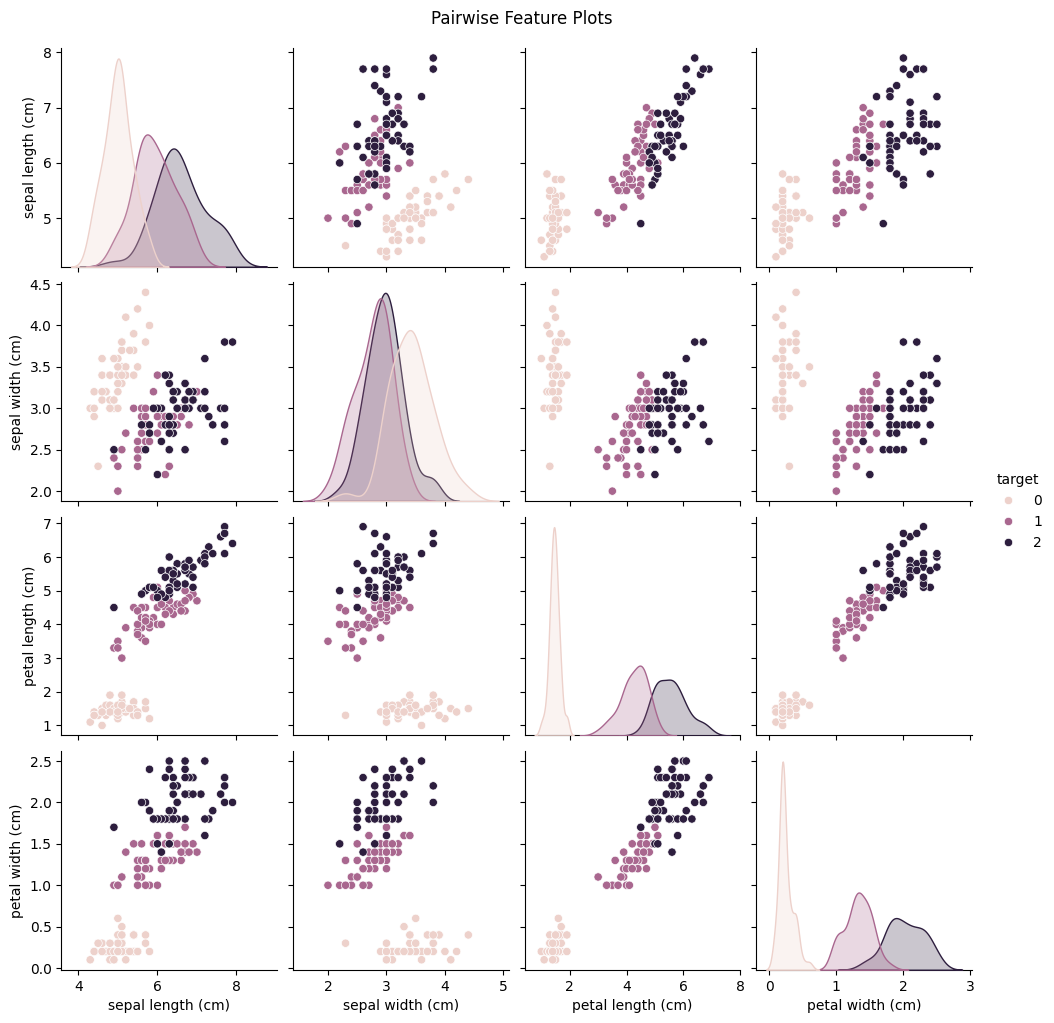

In [5]:
sns.pairplot(df, hue='target')
plt.suptitle("Pairwise Feature Plots", y=1.02)
plt.show()


### Train Test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


### Train the model

In [ ]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Model Evalution 

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



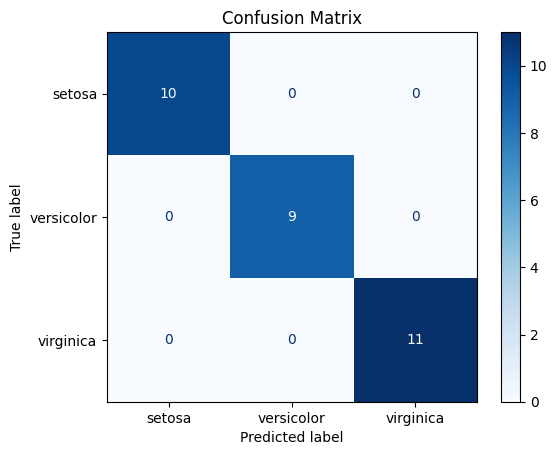

In [10]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


### Feature Importance 

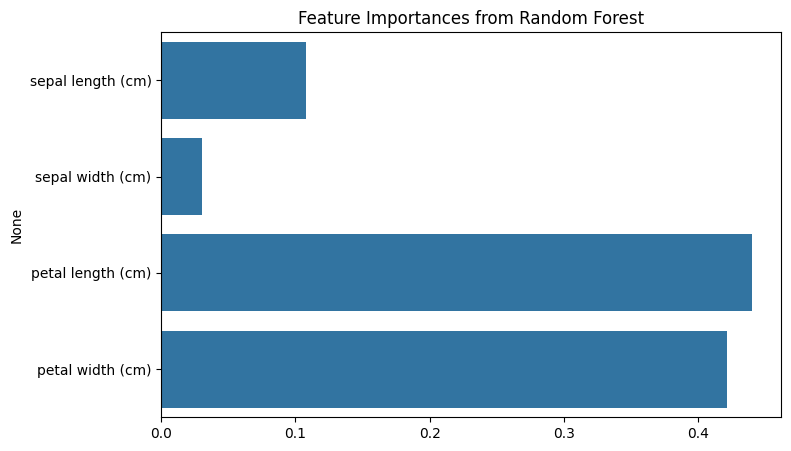

In [ ]:
# Get feature importances and feature names
importances = rf.feature_importances_
feature_names = X.columns

# plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances from Random Forest")
plt.show()


### Train the model using Top-3 Importance feature

In [13]:

# Select top 3 features
top3_idx = np.argsort(importances)[-3:][::-1]
top3_features = feature_names[top3_idx]
print("Top 3 features:", top3_features.tolist())

# Select those features from X
X_top3 = X[top3_features]

# Split train/test on top 3 features
X_train_top3, X_test_top3, y_train_top3, y_test_top3 = train_test_split(X_top3, y, train_size=0.8, random_state=42)

# Retrain Random Forest on top 3 features
rf_top3 = RandomForestClassifier(random_state=42)
rf_top3.fit(X_train_top3, y_train_top3)

# Print accuracy
print("Train Accuracy with top 3 features:", rf_top3.score(X_train_top3, y_train_top3))
print("Test Accuracy with top 3 features:", rf_top3.score(X_test_top3, y_test_top3))

Top 3 features: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']
Train Accuracy with top 3 features: 1.0
Test Accuracy with top 3 features: 1.0


Accuracy with top 3 features: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



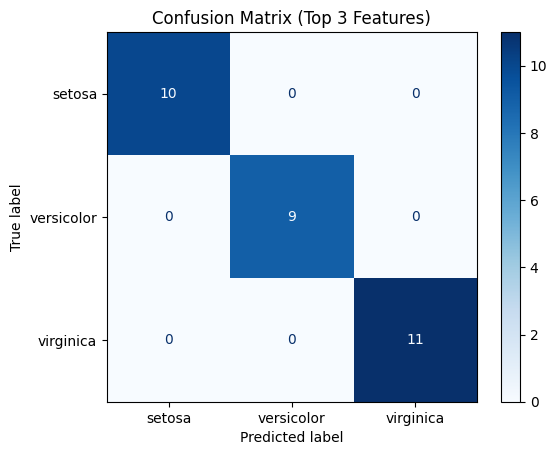

In [15]:
# Select top 3 features from test set
X_test_top3 = X_test[top3_features]

# Predict with trained model on top 3 features 
y_pred_top3 = rf_top3.predict(X_test_top3)

# Print accuracy and classification report
print("Accuracy with top 3 features:", accuracy_score(y_test, y_pred_top3))
print("Classification Report:\n", classification_report(y_test, y_pred_top3))

# Confusion matrix plot
cm_top3 = confusion_matrix(y_test, y_pred_top3)
disp_top3 = ConfusionMatrixDisplay(confusion_matrix=cm_top3, display_labels=iris.target_names)  
disp_top3.plot(cmap='Blues')
plt.title("Confusion Matrix (Top 3 Features)")
plt.show()